<a href="https://colab.research.google.com/github/nicslevelcode/Competition/blob/master/SMA_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (7).csv


In [4]:
AAPL = pd.read_csv('AAPL (6).csv')
AAPL 

,Date,Open,High,Low,Close,Adj Close,Volume
0,22/5/2009,17.721428,17.740000,17.392857,17.500000,15.149704,74499600
1,26/5/2009,17.822857,18.690001,17.792856,18.682858,16.173700,159231800
2,27/5/2009,18.825714,19.282858,18.701429,19.007143,16.454433,161605500
3,28/5/2009,19.064285,19.341429,18.861429,19.295713,16.704248,121888200
4,29/5/2009,19.341429,19.414286,19.121429,19.401428,16.795763,114133600
...,...,...,...,...,...,...,...
2765,18/5/2020,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
2766,19/5/2020,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
2767,20/5/2020,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
2768,21/5/2020,318.660004,320.890015,315.869995,316.850006,316.850006,25672200


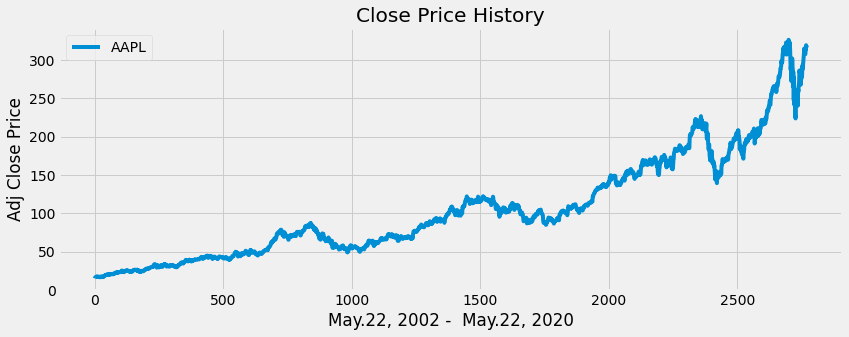

In [5]:
#EDA
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Close Price History')
plt.xlabel('May.22, 2002 -  May.22, 2020')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [6]:
#Create 30 Day SMA
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2765,287.864806
2766,289.577426
2767,291.594106
2768,293.310716


In [7]:
#Create 100 Day SMA
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2765,289.734840
2766,290.037927
2767,290.345799
2768,290.630966


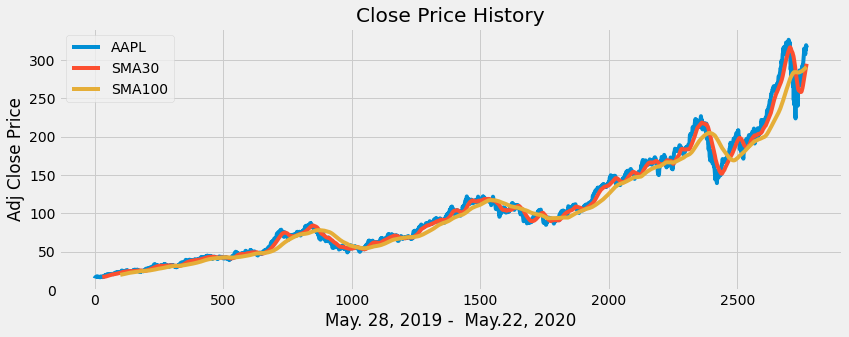

In [8]:
#EDA
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close Price'], label = 'SMA30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA100')
plt.title('Close Price History')
plt.xlabel('May. 28, 2019 -  May.22, 2020')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [9]:
data = pd.DataFrame()
data['AAPL']=AAPL['Adj Close']
data['SMA30']=SMA30['Adj Close Price']
data['SMA100']=SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,15.149704,NaN,NaN
1,16.173700,NaN,NaN
2,16.454433,NaN,NaN
3,16.704248,NaN,NaN
4,16.795763,NaN,NaN
...,...,...,...
2765,314.959991,287.864806,289.734840
2766,313.140015,289.577426,290.037927
2767,319.230011,291.594106,290.345799
2768,316.850006,293.310716,290.630966


In [0]:
#30SMA>100SMA buy, 30SMA<100SMA sell
#Create Buy Sell Signal
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag= -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag =1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

  return(sigPriceSell,sigPriceBuy)

In [0]:
# Store buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

In [30]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,15.149704,NaN,NaN,NaN,NaN
1,16.173700,NaN,NaN,NaN,NaN
2,16.454433,NaN,NaN,NaN,NaN
3,16.704248,NaN,NaN,NaN,NaN
4,16.795763,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2765,314.959991,287.864806,289.734840,NaN,NaN
2766,313.140015,289.577426,290.037927,NaN,NaN
2767,319.230011,291.594106,290.345799,NaN,319.230011
2768,316.850006,293.310716,290.630966,NaN,NaN


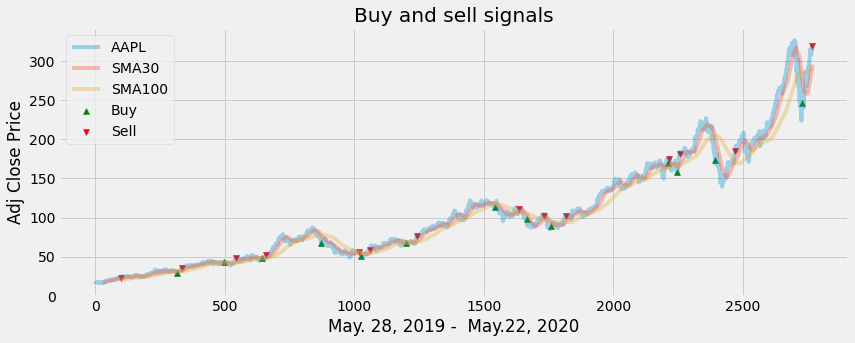

In [31]:
#Visualize the strategy to buy and sell
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color ='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color ='red')
plt.title('Buy and sell signals')
plt.xlabel('May. 28, 2019 -  May.22, 2020')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()